In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Load the Dataset
data_path = 'alzheimers_disease_data (1) .csv'
data = pd.read_csv(data_path)

for col in data.columns:
    if data[col].dtype == 'number':  # Check for numeric columns
        data[col] = data[col].fillna(data[col].median())  # Use median for missing values
    else:  # Non-numeric columns
        data[col] = data[col].fillna('Unknown')  # Replace with 'Unknown'

print("Processed Data:")
print(data)

# Display the first few rows of the dataset
data.head()

data.tail()

data.describe()

data.columns

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or handle them as needed)
data.dropna(inplace=True)

data.drop(columns=['DoctorInCharge'], inplace=True)
data.drop(columns=['PatientID'], inplace=True)

# --- Data Selection ---
# Selecting independent variables (X) and dependent variable (y)
X = data[['Age', 'BMI', 'SystolicBP', 'CholesterolTotal', 'Diabetes', 'Depression']]
y = data['Diagnosis']  # Dependent variable (0 = No Alzheimer's, 1 = Alzheimer's)
print(X)

# Handle missing values (fill with mean for simplicity)
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])  # Replace with the mode for categorical variables

from sklearn.preprocessing import StandardScaler
# Standardize the independent variables for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model Training ---
# Initialize the SVM model with a linear kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42)

In [57]:
# --- Model Training ---
# Initialize the SVM model with a linear kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42)

In [56]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [43]:
# --- Model Evaluation ---
# Predict on the test set
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

In [48]:
# Calculate metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [49]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.64
ROC-AUC Score: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       277
           1       0.00      0.00      0.00       153

    accuracy                           0.64       430
   macro avg       0.32      0.50      0.39       430
weighted avg       0.41      0.64      0.50       430



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

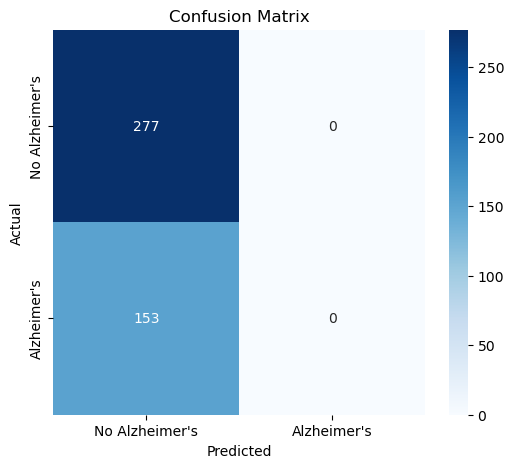

In [52]:
# --- Confusion Matrix Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Alzheimer\'s', 'Alzheimer\'s'], yticklabels=['No Alzheimer\'s', 'Alzheimer\'s'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

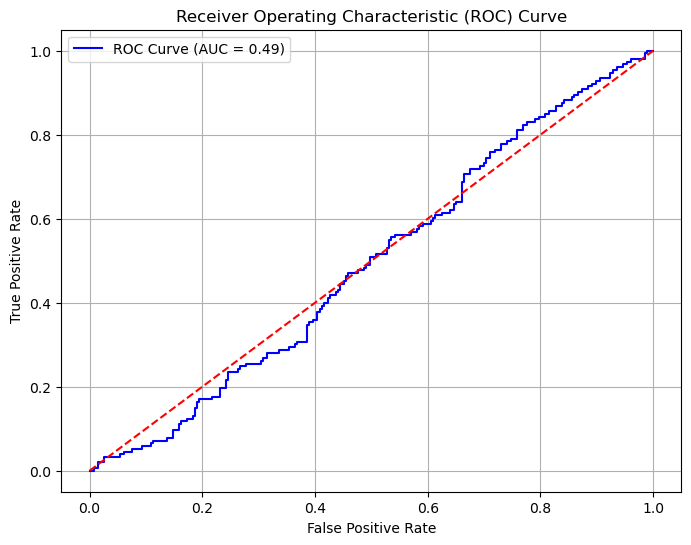

In [53]:
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [54]:
# --- Alternate Kernels (Optional) ---
# Experiment with different SVM kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    svm_model = SVC(kernel=kernel, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")


Training SVM with linear kernel...
Accuracy with linear kernel: 0.64

Training SVM with rbf kernel...
Accuracy with rbf kernel: 0.64

Training SVM with poly kernel...
Accuracy with poly kernel: 0.64

Training SVM with sigmoid kernel...
Accuracy with sigmoid kernel: 0.57
